# 3.5 텐서플로를 사용한 신경망 구현

[https://datascienceschool.net/view-notebook/d397af28eca543a3b31ab4ce8e7f320a/](https://datascienceschool.net/view-notebook/d397af28eca543a3b31ab4ce8e7f320a/)

In [8]:
!pip install tensorflow-gpu==2.0.0-beta1

In [9]:
import tensorflow as tf
tf.__version__

'2.0.0-beta1'

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

In [12]:
print("X train shape : ", X_train0.shape)
print("y train shape : ", y_train0.shape)
print("X test shape : ", X_test0.shape)
print("y test shape : ", y_test0.shape)

X train shape :  (60000, 28, 28)
y train shape :  (60000,)
X test shape :  (10000, 28, 28)
y test shape :  (10000,)


In [ ]:
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0

Y_train = to_categorical(y_train0, 10)
Y_test = to_categorical(y_test0, 10)

In [ ]:
 # 입력 뉴런 개수
 input_layer_nodes = 784

 # 은닉층의 뉴런 개수
 hidden_layer_nodes = 15

 # 은닉층의 가중치와 바이어스
 w1 = tf.Variable(tf.random.normal((input_layer_nodes, hidden_layer_nodes)))
 b1 = tf.Variable(tf.random.normal((hidden_layer_nodes,)))

 # 은닉층 출력 계산
 @tf.function
 def hidden_output(X_batch) :
   return tf.nn.sigmoid(tf.add(tf.matmul(X_batch, w1), b1))

In [ ]:
# 출력층의 가중치와 바이어스
w2 = tf.Variable(tf.random.normal((hidden_layer_nodes, 10)))
b2 = tf.Variable(tf.random.normal((10,)))

# 출력층 출력 계산
@tf.function
def final_output(X_batch) :
  return tf.nn.sigmoid(tf.add(tf.matmul(hidden_output(X_batch), w2), b2))

In [ ]:
# 손실함수
@tf.function
def loss(X_batch, y_target) :
  return tf.nn.softmax_cross_entropy_with_logits(y_target, final_output(X_batch))

In [ ]:
# 최적화 객체
optimizer = tf.keras.optimizers.Adam()

# 학습 실행 코드
@tf.function
def train_step(X_batch, y_target) :
  with tf.GradientTape() as tape :
    loss_val = loss(X_batch, y_target)

  variables = [w1, b1, w2, b2]
  gradients = tape.gradient(loss_val, variables)
  optimizer.apply_gradients(zip(gradients, variables))

  return loss_val

In [19]:
import numpy as np

%time

# 학습
batch_size = 100
epochs = 10
num_iterations = int(60000 / batch_size * epochs)

loss_train = []
loss_test = []

np.random.seed(0)
idx = 0
epoch = 0

for i in range(num_iterations) :
  loss_train_val = train_step(X_train[idx:idx+batch_size, :],
                              Y_train[idx:idx+batch_size, :]).numpy().mean()
  idx += batch_size

  if idx >= 60000:
    loss_train.append(loss_train_val)

    loss_test_val = loss(X_test, Y_test).numpy().mean()
    loss_test.append(loss_test_val)

    epoch += 1
    idx = 0

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.78 µs


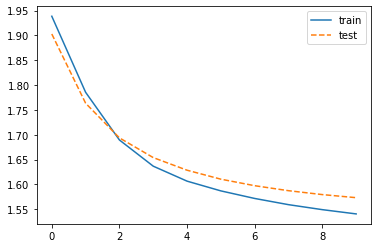

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

# 결과
plt.plot(loss_train, "-", label="train")
plt.plot(loss_test, "--", label="test")
plt.legend()
plt.show()

## 테스트

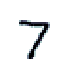

In [28]:
import matplotlib as mpl

plt.figure(figsize=(1,1))
plt.imshow(X_test0[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.axis("off")
plt.show()

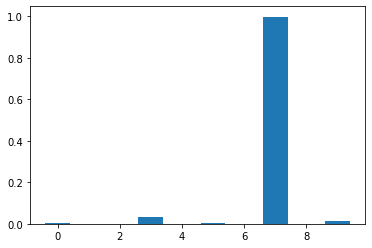

In [29]:
plt.bar(np.arange(10), final_output(X_test[:1, :]).numpy().flatten())
plt.show()